In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve 
import itertools
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Load the dataset data/data_banknote_authentication.txt and assign the following column names: "variance", "skewness", "curtosis", "entropy", "class"

In [ ]:
df = pd.read_csv("data/data_banknote_authentication.txt", header=None, names=["variance", "skewness", "curtosis", "entropy", "class"])
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


# 2. Plot the column class value distribution

In [ ]:
#Class is our Target Label, with zero indicating the Bank Note is Forged and 1 Indicating it is Legit
df['class'].value_counts() #to check if the data is equally balanced between the two classes for prediction

0    762
1    610
Name: class, dtype: int64

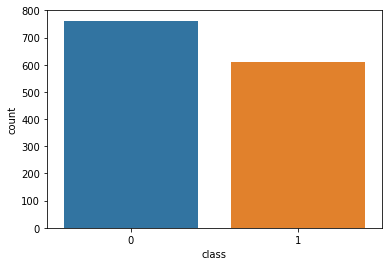

In [ ]:
sns.countplot(df['class'])
plt.show()

# 3. Split the dataset in train and test

In [ ]:
#defining features and target variable
y = df['class']
X = df.drop(columns = ['class'])

#splitting the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. Fit a LogisticRegression classifier

In [ ]:
#Predicting using Logistic Regression for Binary classification 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train) #fitting the model 
y_pred = LR.predict(X_test) #prediction 

# 5. Compute and plot the confusion matrix

[[189   2]
 [  2 150]]


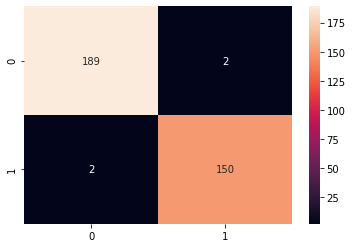

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt="d")

# 6. Extract TP, TN, FP and FN

In [ ]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  189
False Positives:  2
False Negatives:  2
True Positives:  150


# 7. Compute accuracy, precision, recall, f1 score, fbeta score and specificity

In [ ]:
#Accuracy (%) 
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%".format(Accuracy))

Accuracy 98.83%


In [ ]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.99


In [ ]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.99


In [ ]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.99


In [ ]:
#Fbeta score
def fbeta(precision, recall, beta):
    return ((1+pow(beta,2))*precision*recall)/(pow(beta,2)*precision + recall)
            
f2 = fbeta(Precision, Recall, 2)
f0_5 = fbeta(Precision, Recall, 0.5)

print("F2 {:0.2f}".format(f2))
print("\nF0.5 {:0.2f}".format(f0_5))

F2 0.99

F0.5 0.99


In [ ]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.99


# 8. Plot ROC and precision-recall curves

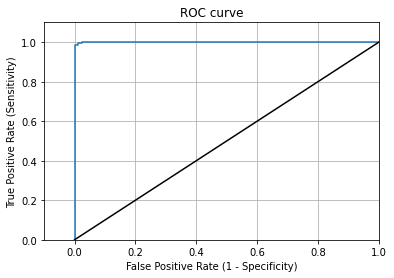

In [ ]:
#ROC
y_pred_proba = LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k-',label='Random')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

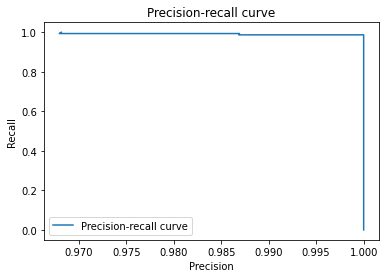

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")